## Import libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('spam.csv',encoding="latin-1")

In [3]:
data.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.shape


(5572, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
data.describe().T

,count,unique,top,freq
v1,5572,2,ham,4825
v2,5572,5169,"Sorry, I'll call later",30
Unnamed: 2,50,43,"bt not his girlfrnd... G o o d n i g h t . . .@""",3
Unnamed: 3,12,10,"MK17 92H. 450Ppw 16""",2
Unnamed: 4,6,5,"GNT:-)""",2


In [7]:
data[data.isnull()].sum()

v1            0
v2            0
Unnamed: 2    0
Unnamed: 3    0
Unnamed: 4    0
dtype: object

# STEPS

## 1. Data cleaning
## 2. EDA
## 3. Data (Text) preprocessing
## 4. Model building
## 5. Evaluation 
## 6. Improvement
## 7. Website
## 8. Deploy

# 1.Data cleaning

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
data.describe().T

,count,unique,top,freq
v1,5572,2,ham,4825
v2,5572,5169,"Sorry, I'll call later",30
Unnamed: 2,50,43,"bt not his girlfrnd... G o o d n i g h t . . .@""",3
Unnamed: 3,12,10,"MK17 92H. 450Ppw 16""",2
Unnamed: 4,6,5,"GNT:-)""",2


### Missing values

In [10]:
data[data.isnull()].sum()

v1            0
v2            0
Unnamed: 2    0
Unnamed: 3    0
Unnamed: 4    0
dtype: object

In [11]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [12]:
data.notnull().sum()

v1            5572
v2            5572
Unnamed: 2      50
Unnamed: 3      12
Unnamed: 4       6
dtype: int64

### Drop last 3 columns

In [13]:
data.drop(['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'],axis=1, inplace=True)

In [14]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Renaming the columns

In [15]:
data.rename(columns={'v1':'Target', 'v2':'Text'}, inplace=True)
data.sample(5)

,Target,Text
2339,ham,Cheers for the message Zogtorius. IåÕve been s...
4833,ham,I hope your pee burns tonite.
2446,ham,"Sorry, I'll call later"
2287,ham,Alex knows a guy who sells mids but he's down ...
3979,spam,ringtoneking 84484


### Label Encoder --> Converting Categorical columns into Numerical columns --> Target

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [17]:
encoder.fit_transform(data['Target'])

array([0, 0, 1, ..., 0, 0, 0])

In [18]:
data['Target']=encoder.fit_transform(data['Target'])

In [19]:
data.sample(5)

,Target,Text
3727,0,The search 4 happiness is 1 of d main sources ...
1409,0,Where at were hungry too
4959,0,I want &lt;#&gt; rs da:)do you have it?
4962,0,I want to see your pretty pussy...
2542,0,Aiyo please Ì_ got time meh.


### Missing values

In [20]:
data.isnull().sum()

Target    0
Text      0
dtype: int64

### Duplicates

In [21]:
data.duplicated().sum()

403

### Remove duplicates

In [22]:
data=data.drop_duplicates(keep='first')

In [23]:
data.duplicated().sum()

0

In [24]:
data.shape

(5169, 2)

# 2. EDA

In [25]:
data.sample(5)

,Target,Text
4486,0,Miss call miss call khelate kintu opponenter m...
3289,0,My tuition is at 330. Hm we go for the 1120 to...
3493,1,You are being contacted by our dating service ...
3341,0,You will go to walmart. I.ll stay.
885,0,Gibbs unsold.mike hussey


In [26]:
data['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

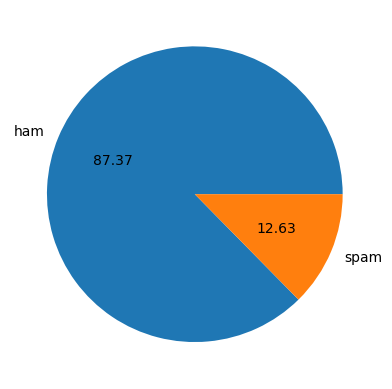

In [27]:
import matplotlib.pyplot as plt
plt.pie(data['Target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

# ---> Data is Imbalanced

## Natural Language Tool Kit

In [28]:
!pip install nltk

In [29]:
import nltk 

#### ---> NLTK require some dependencies to do their work

In [30]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Length (No of caracters) of every row

In [31]:
data['Text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: Text, Length: 5169, dtype: int64

In [32]:
data['num_characters']=data['Text'].apply(len)


In [33]:
data.sample(15)

,Target,Text,num_characters
1914,1,New TEXTBUDDY Chat 2 horny guys in ur area 4 j...,158
2987,0,Do you still have the grinder?,30
2921,0,I've not sent it. He can send me.,33
2354,0,R we going with the &lt;#&gt; bus?,36
481,0,"Yo carlos, a few friends are already asking me...",90
5509,0,Lol they were mad at first but then they woke ...,61
2149,0,Waaaat?? Lololo ok next time then!,34
1897,0,"Aight, sounds good. When do you want me to com...",53
257,0,Where are you lover ? I need you ...,36
985,0,Carlos says he'll be at mu in &lt;#&gt; minutes,49


### No.of words 

In [34]:
# Every sms is breaked doen into no.of words and obtained in list
data['Text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Text, Length: 5169, dtype: object

In [35]:
# count --> no of words per row (per sms)
data['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: Text, Length: 5169, dtype: int64

In [36]:
data['num_words']=data['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [37]:
data.sample(5)

,Target,Text,num_characters,num_words
3640,1,You can stop further club tones by replying \S...,128,24
1455,1,Summers finally here! Fancy a chat or flirt wi...,159,33
562,0,Geeeee ... I love you so much I can barely sta...,51,12
2948,0,at bruce b downs &amp; fletcher now,35,9
2457,0,K.k..how is your sister kids?,29,8


### No of sentenses

In [38]:
#we are breaking (tokenize) every row on the basis of sentense
data['Text'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: Text, Length: 5169, dtype: object

In [39]:
data['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: Text, Length: 5169, dtype: int64

In [40]:
data['num_sentenses']=data['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [41]:
data.head()

,Target,Text,num_characters,num_words,num_sentenses
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [42]:
data[['num_characters', 'num_words', 'num_sentenses']].describe()

,num_characters,num_words,num_sentenses
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [43]:
#Analysing each category in target column differently
# ham messages
data[data['Target']==0][['num_characters', 'num_words', 'num_sentenses']].describe()

,num_characters,num_words,num_sentenses
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [44]:
# spam messages
data[data['Target']==1][['num_characters', 'num_words', 'num_sentenses']].describe()

,num_characters,num_words,num_sentenses
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [45]:
#By observing mean of both spam and not spam we can say that spam messages are big interms of characters used,
#sentenses used, words used

In [46]:
import seaborn as sns

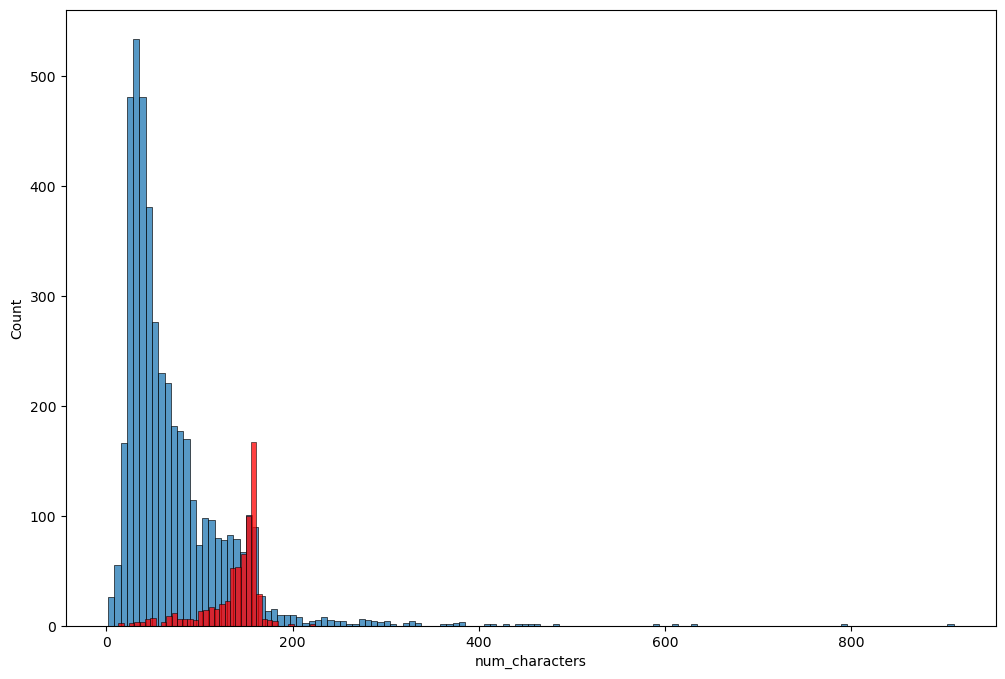

In [47]:
plt.figure(figsize=(12,8))
sns.histplot(data[data['Target']==0]['num_characters']) #---> not spam
sns.histplot(data[data['Target']==1]['num_characters'], color='red') #---> spam
plt.show()

In [48]:
#Most of times not spam (ham) messages are made up of less characters whereas spam messages are made up of more characters

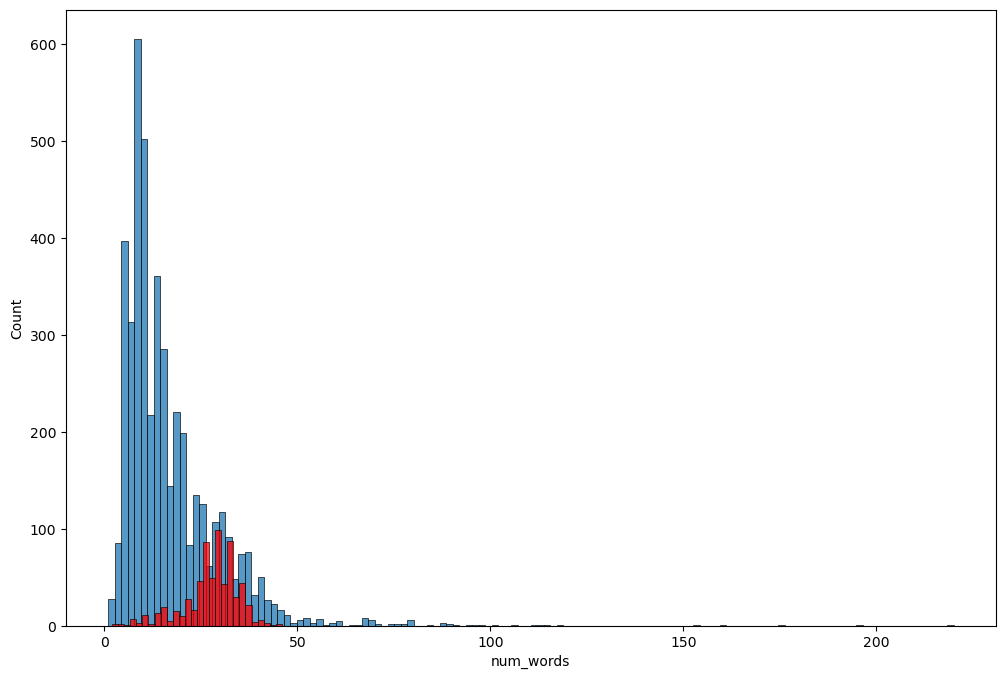

In [49]:
plt.figure(figsize=(12,8))
sns.histplot(data[data['Target']==0]['num_words']) #---> not spam
sns.histplot(data[data['Target']==1]['num_words'], color='red') #---> spam
plt.show()

In [50]:
#Most of times not spam (ham) messages are made up of less words whereas spam messages are made up of more words

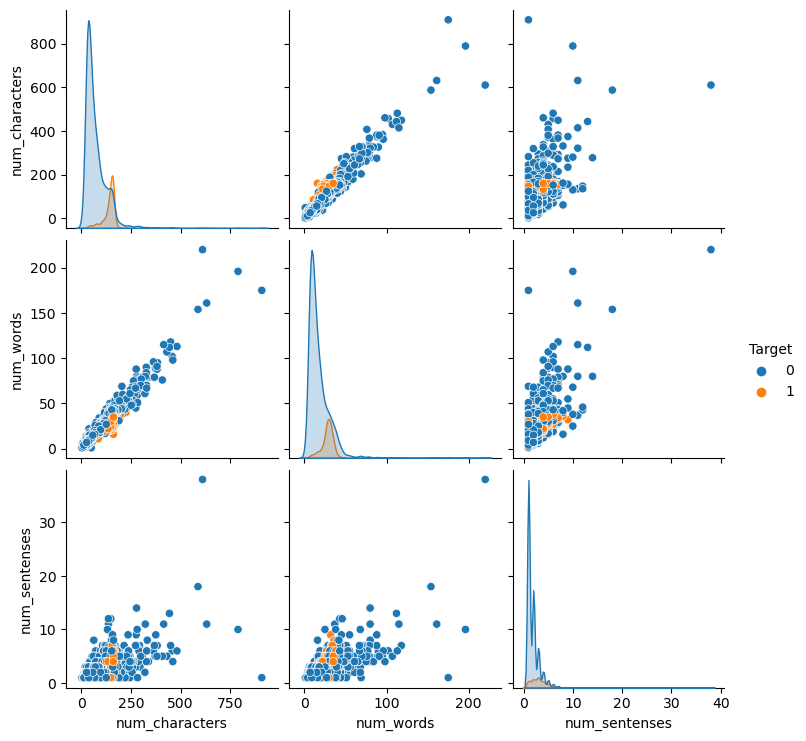

In [51]:
sns.pairplot(data, hue='Target')
plt.show()

In [52]:
# NOTE --> OUTLIERS are present in the data, they can jinx the analysis

In [53]:
data.corr()

C:\Users\aksha\AppData\Local\Temp\ipykernel_16396\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Target,num_characters,num_words,num_sentenses
Target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentenses,0.263939,0.624139,0.679971,1.000000


C:\Users\aksha\AppData\Local\Temp\ipykernel_16396\2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

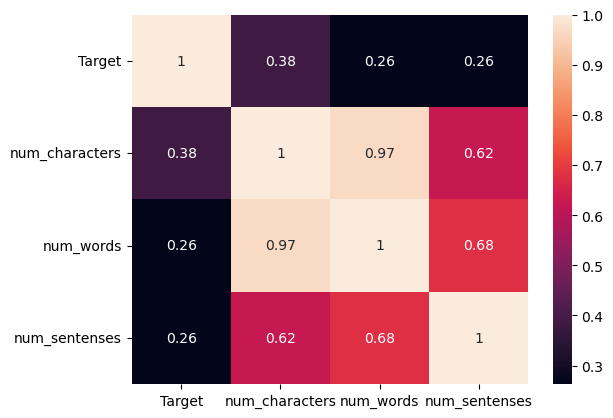

In [54]:
sns.heatmap(data.corr(),annot=True)

In [55]:
# num_sentenses and num_characters are correlated --> 0.62
# num_words and num_sentenses are correlated --> 0.68
# num_words and num_words are highly correlated --> 0.97

# This says that there is multicollinearity in the data
# out of these three columns num_sentenses, num_words and num_words we will only keep only one column i.e., we keep only 
# num_characters b/c with target col variation is 0.38

# 3. Data (Text) preprocessing


### Lower case
### Tokenization
### Removing special characters
### Removing stop words and punctuations
### stemming


In [56]:
# We create a single function which does all these processes

In [57]:
def Transform_text (Text):
    
    #Lower case
    Text=Text.lower()
    
    
    #Tokenization ---> The process of breaking down a piece of text into small units called tokens 
    Text=nltk.word_tokenize(Text)
    
    
    #Removing special characters
    
    #Transform_text("HI AKSHAY Akula ### & %% $ ! * ? > . , ") --> o/p: ['hi', 'akshay', 'akula']
    y=[]
    for i in Text:
        if i.isalnum():
            y.append(i)
    
    
    #Removing stop words and punctuations
    #stop words --> Basically stop words are those words which do not have meaning in the sentense  
    # but it is used for sentense formation
    
    #import nltk
    #nltk.download('stopwords')
    #from nltk.corpus import stopwords
    #stopwords.words('english')
    
    #punctuations --> 
    
    #import string
    #string.punctuation
    Text=y[:] #--> since y is list it is mutable data type we need to do cloning
    y.clear()
    for i in Text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    #stemming
    Text=y[:] #--> since y is list it is mutable data type we need to do cloning
    y.clear()
    for i in Text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [58]:
#Removing special characters
Transform_text("HI AKSHAY Akula ### & %% $ ! * ? > . , ")

NameError: name 'stopwords' is not defined

In [59]:
#Removing stop words 
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [60]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [61]:
#Removing  punctuations
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [62]:
#stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [63]:
Transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [64]:
data['Text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [65]:
data['Text'].apply(Transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Text, Length: 5169, dtype: object

In [66]:
data['Transformed_text']=data['Text'].apply(Transform_text)

In [67]:
data.sample(5)

,Target,Text,num_characters,num_words,num_sentenses,Transformed_text
2151,0,I surely dont forgot to come:)i will always be...,70,20,1,sure dont forgot come alway touch
2491,0,"Greetings me, ! Consider yourself excused.",42,8,2,greet consid excus
3391,0,What r u cooking me for dinner?,31,8,1,r u cook dinner
1364,0,Hey i will be really pretty late... You want t...,114,28,3,hey realli pretti late want go lesson first jo...
2357,0,Okay same with me. Well thanks for the clarifi...,52,10,2,okay well thank clarif


In [68]:
#we will make wordcloud for both spam and not spam
#what wordcloud does is, the important words will be made big 

In [1]:
#wordcloud of spam messages
#for this we need wordcloud module it is already inbuilt in anaconda
from wordcloud import WordCloud
wc=WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [2]:
wc.generate(data[data['Target']==1]['Transformed_text'].str.cat(sep=' '))

NameError: name 'data' is not defined

In [71]:
spam_wc=wc.generate(data[data['Target']==1]['Transformed_text'].str.cat(sep=' '))

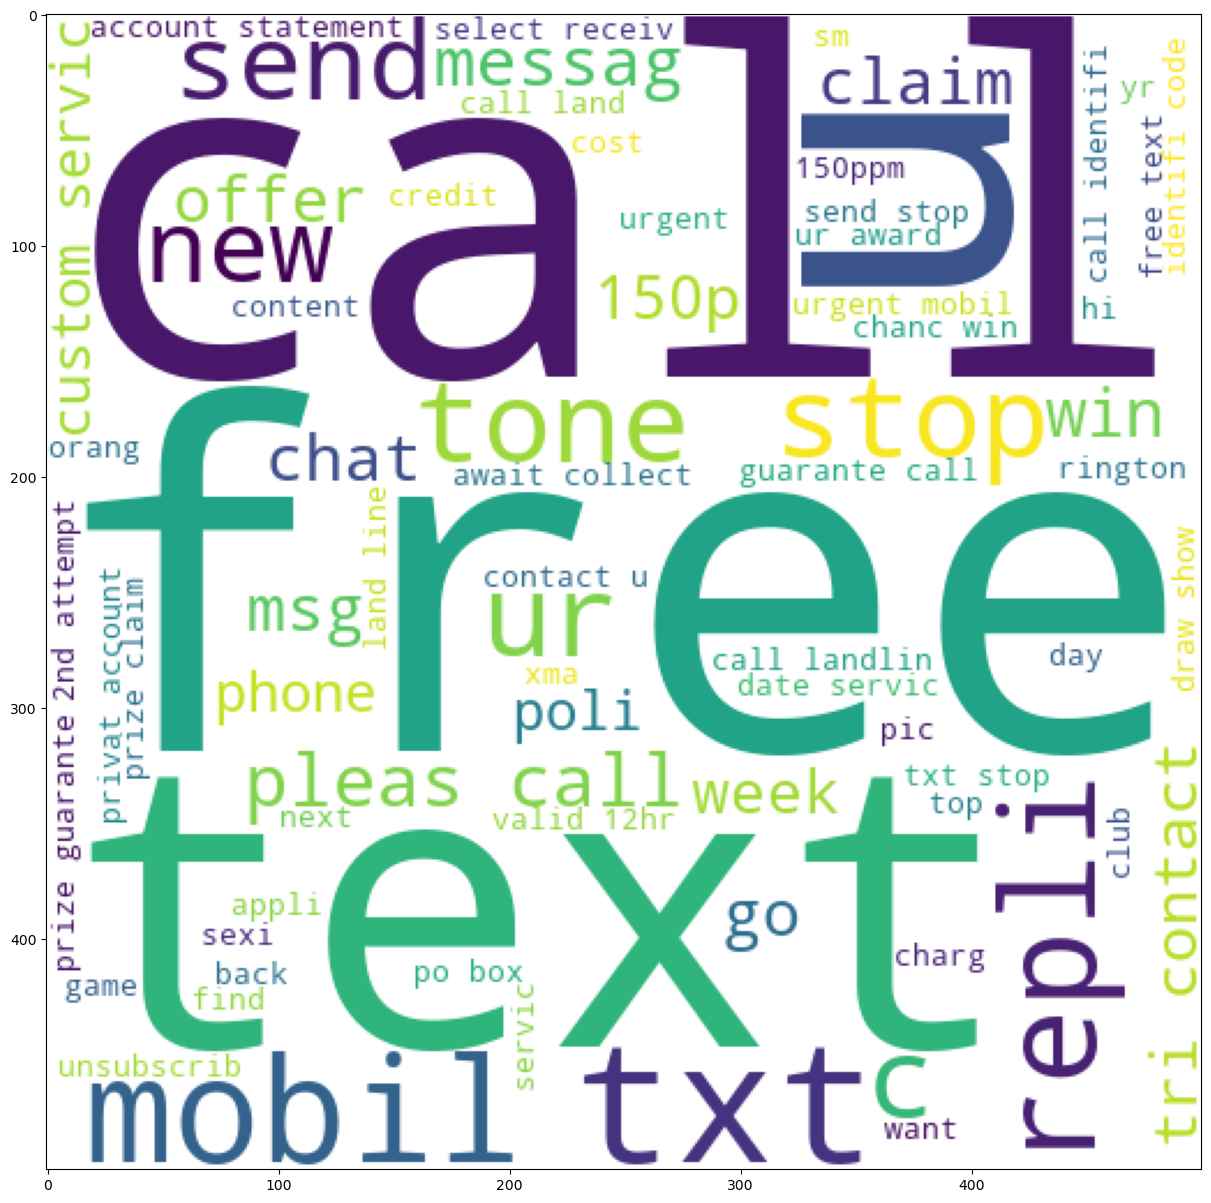

In [72]:
plt.figure(figsize=(15,15))
plt.imshow(spam_wc)
plt.show()

In [73]:
wc.generate(data[data['Target']==0]['Transformed_text'].str.cat(sep=' '))

In [74]:
ham_wc=wc.generate(data[data['Target']==0]['Transformed_text'].str.cat(sep=' '))

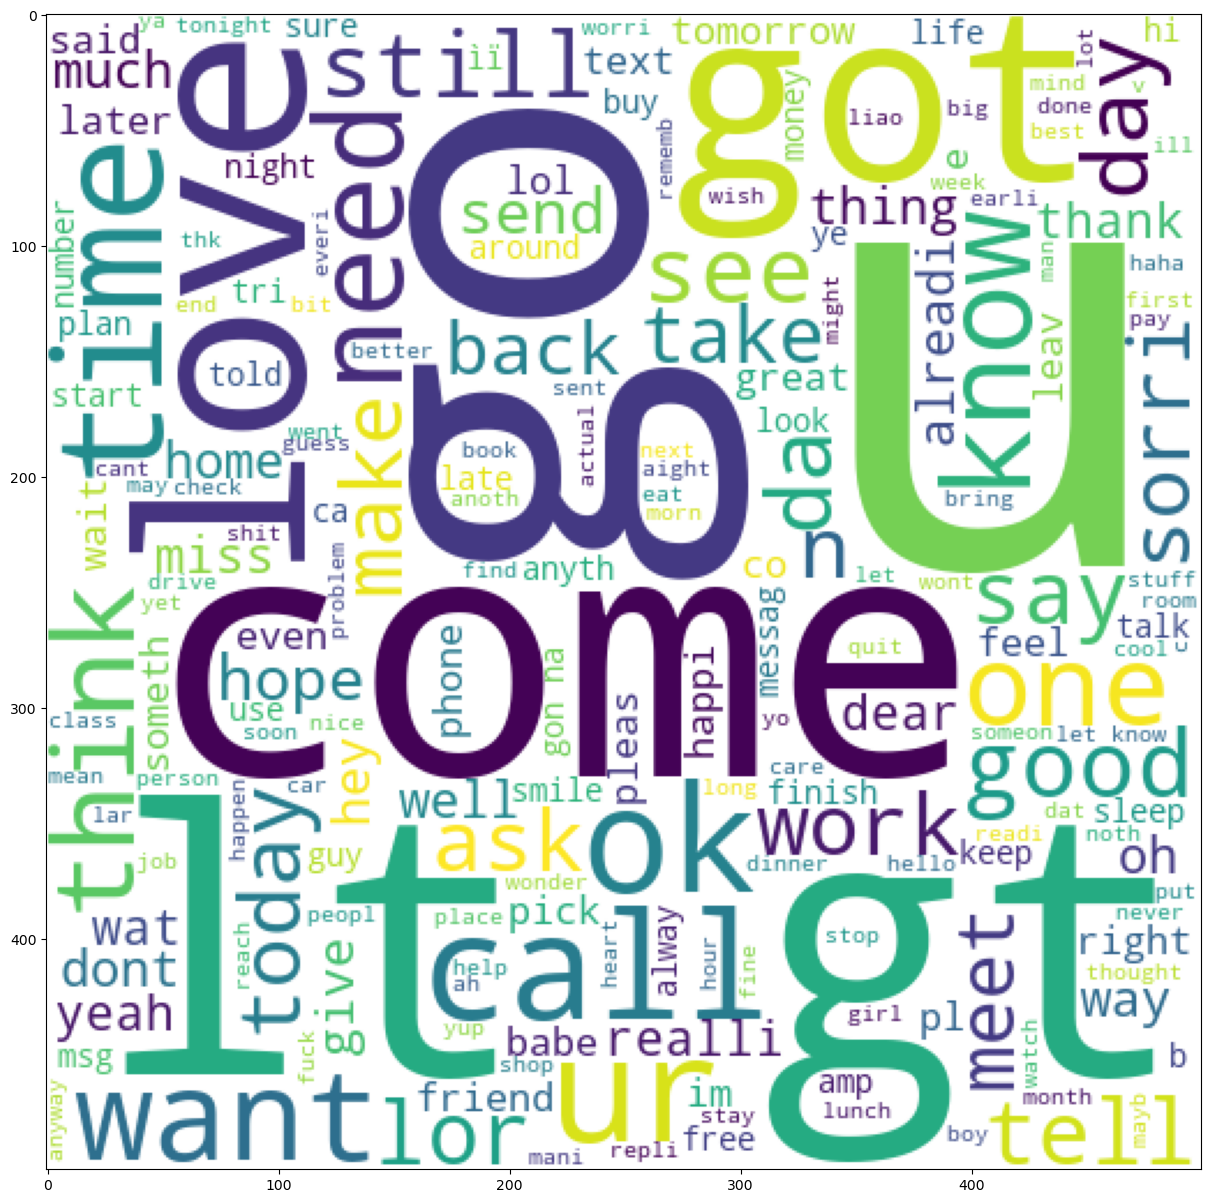

In [75]:
plt.figure(figsize=(15,15))
plt.imshow(ham_wc)
plt.show()

In [76]:
# we extract top 30 words (most used) for both ham and spam messages

In [77]:
data.head()


,Target,Text,num_characters,num_words,num_sentenses,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [78]:
# For spam messages
data[data['Target']==1]['Transformed_text'].tolist()


['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [79]:
for msg in data[data['Target']==1]['Transformed_text'].tolist():
    print(msg)

free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv
winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour
mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030
six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info
urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18
xxxmobilemovieclub use credit click wap link next txt messag click http
england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq
thank subscript rington uk mobil charg pleas confirm repli ye repli charg
07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow
sm ac sptv new jersey devil detroit red wi

In [80]:
for msg in data[data['Target']==1]['Transformed_text'].tolist():
    for word in msg.split():
        print(word)

free
entri
2
wkli
comp
win
fa
cup
final
tkt
21st
may
text
fa
87121
receiv
entri
question
std
txt
rate
c
appli
08452810075over18
freemsg
hey
darl
3
week
word
back
like
fun
still
tb
ok
xxx
std
chg
send
rcv
winner
valu
network
custom
select
receivea
prize
reward
claim
call
claim
code
kl341
valid
12
hour
mobil
11
month
u
r
entitl
updat
latest
colour
mobil
camera
free
call
mobil
updat
co
free
08002986030
six
chanc
win
cash
100
pound
txt
csh11
send
cost
6day
tsandc
appli
repli
hl
4
info
urgent
1
week
free
membership
prize
jackpot
txt
word
claim
81010
c
lccltd
pobox
4403ldnw1a7rw18
xxxmobilemovieclub
use
credit
click
wap
link
next
txt
messag
click
http
england
v
macedonia
dont
miss
news
txt
ur
nation
team
87077
eg
england
87077
tri
wale
scotland
poboxox36504w45wq
thank
subscript
rington
uk
mobil
charg
pleas
confirm
repli
ye
repli
charg
07732584351
rodger
burn
msg
tri
call
repli
sm
free
nokia
mobil
free
camcord
pleas
call
08000930705
deliveri
tomorrow
sm
ac
sptv
new
jersey
devil
detroit
red
wi

In [81]:
spam_corpus=[]
for msg in data[data['Target']==1]['Transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [82]:
spam_corpus


['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [83]:
len(spam_corpus) #--> Total no.of words in spam messages

9939

In [84]:
# from  collections we import counter class
# counter will create a dictionary which says frequency of every word

In [85]:
from collections import Counter
Counter(spam_corpus)

Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

In [86]:
from collections import Counter
Counter(spam_corpus).most_common(50)


[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45),
 ('custom', 42),
 ('messag', 42),
 ('guarante', 42),
 ('per', 41),
 ('chat', 38),
 ('tri', 37),
 ('msg', 35),
 ('draw', 35),
 ('number', 35),
 ('cs', 35),
 ('show', 33),
 ('today', 33),
 ('offer', 33),
 ('line', 33),
 ('go', 32),
 ('receiv', 31),
 ('want', 31),
 ('latest', 30),
 ('rington', 30),
 ('landlin', 30)]

In [87]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))


,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


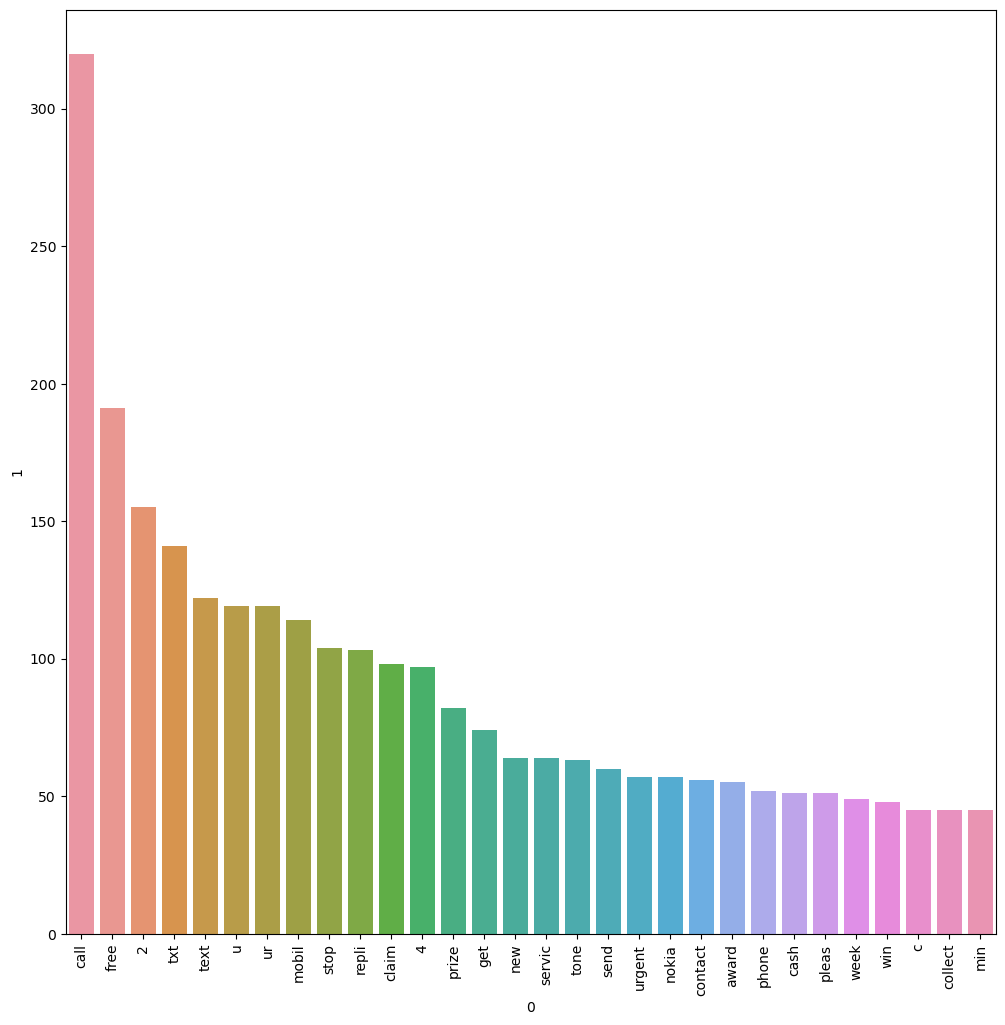

In [88]:
plt.figure(figsize=(12,12))
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation=90)
plt.show()

In [89]:
# In MACHINE LEARNING Interpretability is also important that is the reason we are doing this, even without doing this 
# we can do SMS spam classifier
# EDA performed here is just for our understanding

In [90]:
# For ham messages
ham_corpus=[]
for msg in data[data['Target']==0]['Transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [91]:
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

In [92]:
len(ham_corpus) #--> Total no.of words in ham messages

35404

In [93]:
from collections import Counter
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


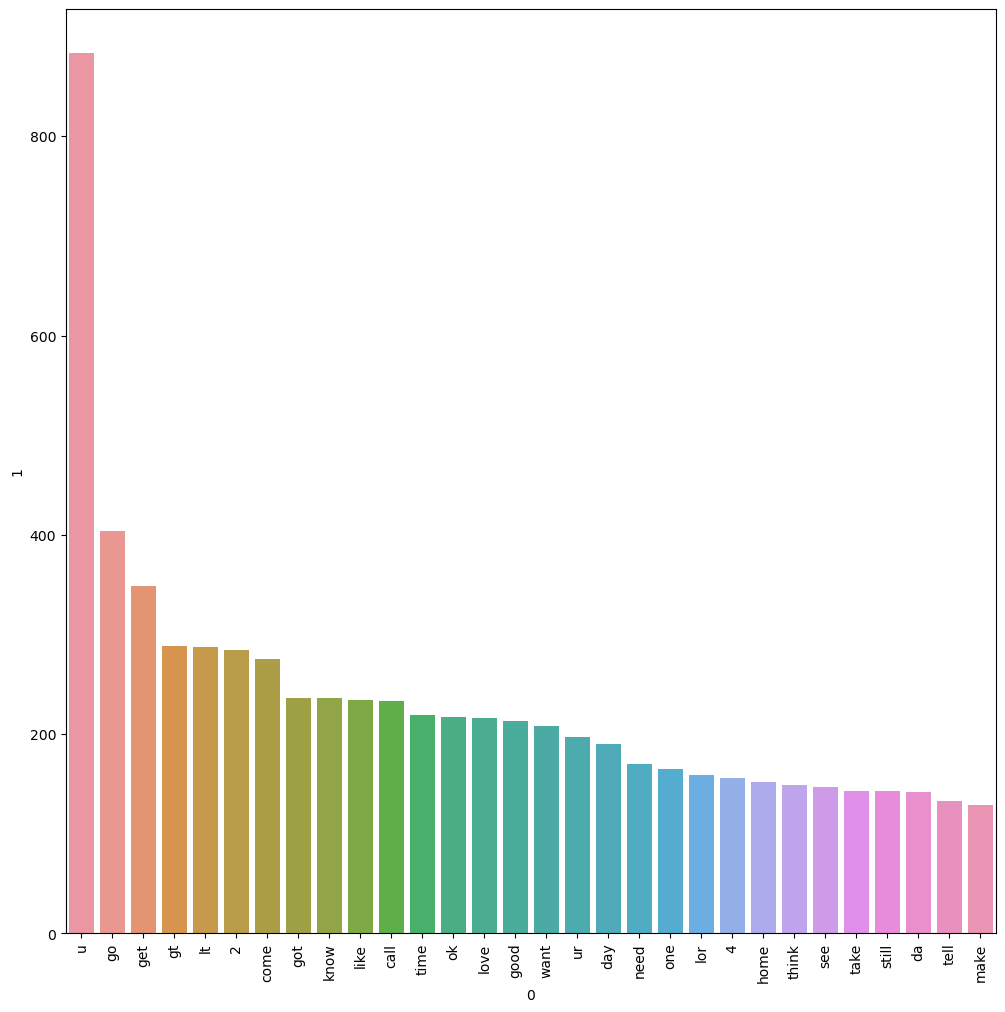

In [94]:
plt.figure(figsize=(12,12))
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation=90)
plt.show()

# 4. Model Building

In [95]:
# Firstly we will use NAVIE BAYES algorithm, because it is said that generally NAVIE BAYES algorithm performs better on the 
# textual data and later on we do perform other algorithms and compare the results

In [96]:
# Any MACHINE LEARNING algorithm needs numbers they can't understand text. so we need to convert Transformed_text 
# into numerical data or we can say that text should be converted into vectors (vectrozise)

# There are some methods to convert text into vectors
#   1. Bag of words --> we make the column of frequent words and for every message we check that how many times we are getting
#                       the frequent words those numbers will become a vector
#   2. TF-IDF
#   3. word to vec

In [97]:
# we vectorize our data using Bag of words and then we give it as I/P

### Bag of words

In [98]:
# Bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()


In [99]:
x=cv.fit_transform(data['Transformed_text']).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [100]:
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [101]:
x.shape # --> 5169 -> sms , 6708 -> words 

(5169, 6708)

In [102]:
y=data['Target'].values

In [103]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [104]:
print(y)

[0 0 1 ... 0 0 0]


In [105]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
# precision_score is used because SMS_SPAM-Classifier is a high precision model (we want to reduce FALSE POSITIVES)

In [106]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [107]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [108]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [109]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [110]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [111]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


### TF-IDF

In [259]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

In [260]:
x=tfidf.fit_transform(data['Transformed_text']).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [261]:
x.shape

(5169, 6708)

In [262]:
print(x)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [263]:
y=data['Target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [264]:
print(y)

[0 0 1 ... 0 0 0]


In [118]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)


In [119]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [265]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
# Accuracy score is decreased a bit but precission score is max i.e,=1 when compared with Bag of words
# False positive=0

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [121]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [122]:
# we have two options mnb,bnb since precision score is more reliable we will go with mnb even though accuracy is less
# Here accuracy score is not reliable because data is imbalanced
# In TF-IDF vectorizer for mnb the precission score=1 (no sms is classified in such a way that our model says sms is 
# spam but actually that sms is not spam)

# TF-IDF --> mnb

In [123]:
# we will try other machine learning algorithms and compare with mnb setting

# 5.Evaluation

In [124]:
!pip3 install xgboost

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [126]:
lrc=LogisticRegression(solver='liblinear',penalty='l1')
svc=SVC(kernel='sigmoid', gamma=1.0)
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
knc=KNeighborsClassifier()
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbc=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [127]:
# Dictionary is created where keys are name of the algorithm and values are objects of class of the algorithms

In [204]:
clfs={
    'LR': lrc,
    'SVM': svc,
    'MNB': mnb,
    'DT': dtc,
    'KNN': knc,
    'RF': rfc,
    'ADA_BOOST': abc,
    'BAGGING_CLF': bc,
    'EXTRA_TREES': etc,
    'GB': gbc,
    'XGB': xgb
    
}

In [205]:
# creating a function to train and test the model and return accuracy and precision score

In [206]:
def train_classifier (clfs,x_train,y_train,x_test,y_test):
    clfs.fit(x_train,y_train)
    y_pred=clfs.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy,precision

In [207]:
# Example 

train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [208]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
    
    current_accuracy, current_precision=train_classifier(clf,x_train,y_train,x_test,y_test)
    
    print('For', name)
    print('Accuracy -', current_accuracy)
    print('precision -', current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For LR
Accuracy - 0.9584139264990329
precision - 0.9702970297029703
For SVM
Accuracy - 0.9758220502901354
precision - 0.9747899159663865
For MNB
Accuracy - 0.9709864603481625
precision - 1.0
For DT
Accuracy - 0.9323017408123792
precision - 0.8333333333333334
For KNN
Accuracy - 0.9052224371373307
precision - 1.0
For RF
Accuracy - 0.9758220502901354
precision - 0.9829059829059829
For ADA_BOOST
Accuracy - 0.960348162475822
precision - 0.9292035398230089
For BAGGING_CLF
Accuracy - 0.9584139264990329
precision - 0.8682170542635659
For EXTRA_TREES
Accuracy - 0.9748549323017408
precision - 0.9745762711864406
For GB
Accuracy - 0.9468085106382979
precision - 0.9191919191919192
For XGB
Accuracy - 0.9671179883945842
precision - 0.9262295081967213


In [209]:
{'Algorithm':clfs.keys(), 'Accuracy_score':accuracy_scores, 'Precision_score':precision_scores}

{'Algorithm': dict_keys(['LR', 'SVM', 'MNB', 'DT', 'KNN', 'RF', 'ADA_BOOST', 'BAGGING_CLF', 'EXTRA_TREES', 'GB', 'XGB']),
 'Accuracy_score': [0.9584139264990329,
  0.9758220502901354,
  0.9709864603481625,
  0.9323017408123792,
  0.9052224371373307,
  0.9758220502901354,
  0.960348162475822,
  0.9584139264990329,
  0.9748549323017408,
  0.9468085106382979,
  0.9671179883945842],
 'Precision_score': [0.9702970297029703,
  0.9747899159663865,
  1.0,
  0.8333333333333334,
  1.0,
  0.9829059829059829,
  0.9292035398230089,
  0.8682170542635659,
  0.9745762711864406,
  0.9191919191919192,
  0.9262295081967213]}

In [210]:
performance_data = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy_score':accuracy_scores, 'Precision_score':precision_scores})

In [211]:
performance_data

,Algorithm,Accuracy_score,Precision_score
0,LR,0.958414,0.970297
1,SVM,0.975822,0.974790
2,MNB,0.970986,1.000000
3,DT,0.932302,0.833333
4,KNN,0.905222,1.000000
5,RF,0.975822,0.982906
6,ADA_BOOST,0.960348,0.929204
7,BAGGING_CLF,0.958414,0.868217
8,EXTRA_TREES,0.974855,0.974576
9,GB,0.946809,0.919192


In [212]:
# sorted based on Accuracy_score
performance_data = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy_score':accuracy_scores, 'Precision_score':precision_scores}).sort_values('Accuracy_score',ascending=False,axis=0)

In [213]:
performance_data


,Algorithm,Accuracy_score,Precision_score
1,SVM,0.975822,0.974790
5,RF,0.975822,0.982906
8,EXTRA_TREES,0.974855,0.974576
2,MNB,0.970986,1.000000
10,XGB,0.967118,0.926230
6,ADA_BOOST,0.960348,0.929204
0,LR,0.958414,0.970297
7,BAGGING_CLF,0.958414,0.868217
9,GB,0.946809,0.919192
3,DT,0.932302,0.833333


In [214]:
# sorted based on precision_score
performance_data = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy_score':accuracy_scores, 'Precision_score':precision_scores}).sort_values('Precision_score',ascending=False,axis=0)

In [215]:
performance_data

,Algorithm,Accuracy_score,Precision_score
2,MNB,0.970986,1.000000
4,KNN,0.905222,1.000000
5,RF,0.975822,0.982906
1,SVM,0.975822,0.974790
8,EXTRA_TREES,0.974855,0.974576
0,LR,0.958414,0.970297
6,ADA_BOOST,0.960348,0.929204
10,XGB,0.967118,0.926230
9,GB,0.946809,0.919192
7,BAGGING_CLF,0.958414,0.868217


In [216]:
performance_data1=pd.melt(performance_data, id_vars='Algorithm')

In [217]:
performance_data1


,Algorithm,variable,value
0,MNB,Accuracy_score,0.970986
1,KNN,Accuracy_score,0.905222
2,RF,Accuracy_score,0.975822
3,SVM,Accuracy_score,0.975822
4,EXTRA_TREES,Accuracy_score,0.974855
5,LR,Accuracy_score,0.958414
6,ADA_BOOST,Accuracy_score,0.960348
7,XGB,Accuracy_score,0.967118
8,GB,Accuracy_score,0.946809
9,BAGGING_CLF,Accuracy_score,0.958414


In [218]:
# If our focus is on precision_score then choose NB, if our focus is on Accuracy_score then choose SVM,EXTRA_TREES,XGB,RF
# If we want to focus both Accuracy_score and precision_score then choose EXTRA_TREES,XGB,RF

<Figure size 1200x1200 with 0 Axes>

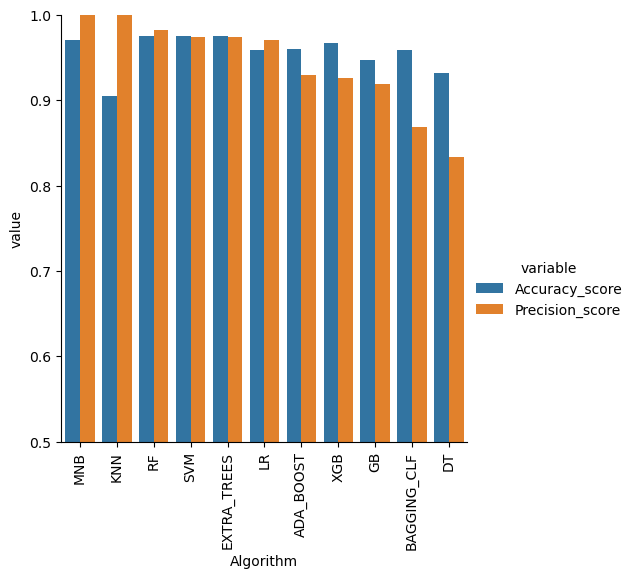

In [219]:
plt.figure(figsize=(12,12))
sns.catplot(x='Algorithm', y='value',hue='variable',data=performance_data1,kind='bar')
plt.ylim(0.5,1.0)
plt.xticks(rotation=90)
plt.show()

# 6.Improvements

In [272]:
# 1. change the max_feature parameter of TF-IDI (firstly we took all the unique words but by using max_features 
# we can constrained it i.e, we can have only most used words)

In [273]:
# Repeat step-4 and step-5 for various hyperparameters for max_features=3000 we got good results

In [287]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)

In [288]:
x=tfidf.fit_transform(data['Transformed_text']).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [289]:
x.shape

(5169, 3000)

In [290]:
print(x)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [291]:
y=data['Target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [292]:
print(y)

[0 0 1 ... 0 0 0]


In [293]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)


In [294]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score

In [295]:
mnb=MultinomialNB()

In [296]:
mnb.fit(x_train,y_train)
y_pred=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [229]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [230]:
lrc=LogisticRegression(solver='liblinear',penalty='l1')
svc=SVC(kernel='sigmoid', gamma=1.0)
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
knc=KNeighborsClassifier()
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbc=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [231]:
clfs={
    'LR': lrc,
    'SVM': svc,
    'MNB': mnb,
    'DT': dtc,
    'KNN': knc,
    'RF': rfc,
    'ADA_BOOST': abc,
    'BAGGING_CLF': bc,
    'EXTRA_TREES': etc,
    'GB': gbc,
    'XGB': xgb
    
}

In [232]:
def train_classifier (clfs,x_train,y_train,x_test,y_test):
    clfs.fit(x_train,y_train)
    y_pred=clfs.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy,precision

In [233]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
    
    current_accuracy, current_precision=train_classifier(clf,x_train,y_train,x_test,y_test)
    
    print('For', name)
    print('Accuracy -', current_accuracy)
    print('precision -', current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For LR
Accuracy - 0.9584139264990329
precision - 0.9702970297029703
For SVM
Accuracy - 0.9758220502901354
precision - 0.9747899159663865
For MNB
Accuracy - 0.9709864603481625
precision - 1.0
For DT
Accuracy - 0.9323017408123792
precision - 0.8333333333333334
For KNN
Accuracy - 0.9052224371373307
precision - 1.0
For RF
Accuracy - 0.9758220502901354
precision - 0.9829059829059829
For ADA_BOOST
Accuracy - 0.960348162475822
precision - 0.9292035398230089
For BAGGING_CLF
Accuracy - 0.9584139264990329
precision - 0.8682170542635659
For EXTRA_TREES
Accuracy - 0.9748549323017408
precision - 0.9745762711864406
For GB
Accuracy - 0.9468085106382979
precision - 0.9191919191919192
For XGB
Accuracy - 0.9671179883945842
precision - 0.9262295081967213


In [234]:
temp_data = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy_score_max_3000':accuracy_scores, 'Precision_score_max_3000':precision_scores})

In [235]:
temp_data1=pd.melt(temp_data, id_vars='Algorithm')
temp_data1

,Algorithm,variable,value
0,LR,Accuracy_score_max_3000,0.958414
1,SVM,Accuracy_score_max_3000,0.975822
2,MNB,Accuracy_score_max_3000,0.970986
3,DT,Accuracy_score_max_3000,0.932302
4,KNN,Accuracy_score_max_3000,0.905222
5,RF,Accuracy_score_max_3000,0.975822
6,ADA_BOOST,Accuracy_score_max_3000,0.960348
7,BAGGING_CLF,Accuracy_score_max_3000,0.958414
8,EXTRA_TREES,Accuracy_score_max_3000,0.974855
9,GB,Accuracy_score_max_3000,0.946809


In [236]:
new_data=performance_data.merge(temp_data,on='Algorithm')
new_data

,Algorithm,Accuracy_score,Precision_score,Accuracy_score_max_3000,Precision_score_max_3000
0,MNB,0.970986,1.000000,0.970986,1.000000
1,KNN,0.905222,1.000000,0.905222,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906
3,SVM,0.975822,0.974790,0.975822,0.974790
4,EXTRA_TREES,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297
6,ADA_BOOST,0.960348,0.929204,0.960348,0.929204
7,XGB,0.967118,0.926230,0.967118,0.926230
8,GB,0.946809,0.919192,0.946809,0.919192
9,BAGGING_CLF,0.958414,0.868217,0.958414,0.868217


In [237]:
# Accuracy_score is increased from 0.959 to 0.970 and even now precision_score=1

In [238]:
# 2. we can do scaling(use min-max scalar because if we use standard scalar we get -ve values)

In [239]:
# 3. we created 3 more features (no.of words, no.of characters, no.of sentenses)
# we can add no.of characters column in input and we can run the total flow again

# x=np.hstack(x,data['num_characters'].values.reshape(-1,1))
# x.shape --> (5169,3001)  [3000 --> from vectorization and 1 --> from newely added column]

In [240]:
# 4. voting classifier

# we take top 3 best performing algorithms (SVC, MNB,ETC)to perform voting classifier

In [241]:
svc=SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50, random_state=2)


In [242]:
from sklearn.ensemble import VotingClassifier


In [243]:
voting=VotingClassifier(estimators=[('svm', svc),('MNB', mnb),('EXTRA_TREES', etc)], voting='soft')

In [244]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('MNB', MultinomialNB()),
                             ('EXTRA_TREES',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [245]:
y_pred=voting.predict(x_test)
print('Accuracy_score', accuracy_score(y_test,y_pred))
print('precision_score', precision_score(y_test,y_pred))

Accuracy_score 0.9816247582205029
precision_score 0.9917355371900827


In [246]:
# 5. stacking

# we take top 3 best performing algorithms (SVC, MNB,ETC) as estimators and RF as final estimators
# to perform stacking classifier  

In [247]:
estimators=[('svm', svc),('MNB', mnb),('EXTRA_TREES', etc)]
final_estimator=RandomForestClassifier()

In [248]:
from sklearn.ensemble import StackingClassifier


In [249]:
clf=StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [250]:
clf.fit(x_train,y_train)

StackingClassifier(estimators=[('svm',
                                SVC(gamma=1.0, kernel='sigmoid',
                                    probability=True)),
                               ('MNB', MultinomialNB()),
                               ('EXTRA_TREES',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2))],
                   final_estimator=RandomForestClassifier())

In [251]:
y_pred=clf.predict(x_test)
print('Accuracy_score', accuracy_score(y_test,y_pred))
print('precision_score', precision_score(y_test,y_pred))

Accuracy_score 0.9796905222437138
precision_score 0.9465648854961832


In [252]:
# By using voting,stacking our performance didn't get better 

In [253]:
# we can try even more techniques and compare performances

In [254]:
# Let's use MultinomialNB TF-IDF (max_features=3000) because this algorithm is giving best results

In [255]:
# when we get new query point(sms) then we need to perform 3 steps brefiely:
#  1. preprocessing --> we created a function that does text preprocessing (transform_text)
#  2. vectorize
#  3. apply algorithm

In [256]:
# lets pickle 2 files

In [297]:
import pickle

In [298]:
pickle.dump(tfidf,open('vectorizer.pkl', 'wb'))
pickle.dump(mnb,open('model.pkl', 'wb'))